In [91]:
import matplotlib.pyplot as plt
import numpy as np

Arduino DUE имеет проблему с DAC0/1 в том плане что он не выдает от 0 до 3.3V, а что то типа такого:
https://arduino.stackexchange.com/questions/50178/analogwritedac0-x-analog-voltage-on-dac0-pin-is-higher-for-lower-x-value-i

Здесь я попробую установить функцию зависимости напряжения от параметра в analogWrite(DAC0, p)

на ардуинке был такой скетч:

for (int i = 0; i < 4096; i++) {
    analogWrite(DAC0, i);
    Serial.println(i);
    Serial.println(analogRead(A0));
    Serial.println();
}

Вывод был скопирован и помещен в V_p.t

In [92]:
data = []
with open('V_p.txt', 'r') as f:
    data = f.readlines()

In [ ]:
data[:10]

In [93]:
data = np.array([int(d.strip()) for d in data if d != '\n'])

In [94]:
X = data[::2]
Y = data[1::2]
X, Y

(array([   0,    1,    2, ..., 4093, 4094, 4095]),
 array([   0,  643,  655, ..., 3405, 3405, 3408]))

In [110]:
p, v = np.polyfit(X, Y, deg=1, cov=True)
f = np.poly1d(p)
p

array([  0.66880448, 667.70559513])

(1.9319353581511735e-08, 0.10800209318955599)

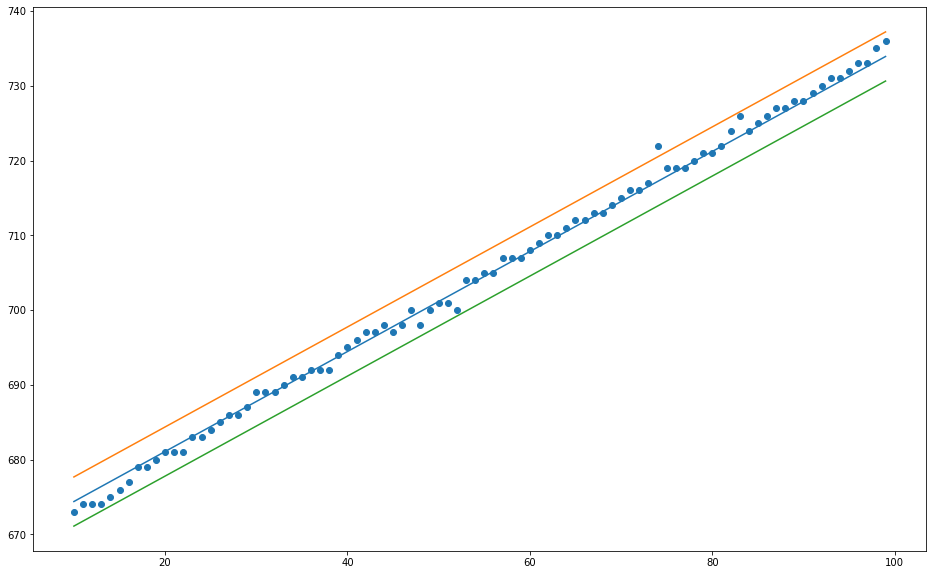

In [96]:
X_s = X[10:100]
Y_s = Y[10:100]
plt.figure(figsize=(16, 10))
plt.scatter(X_s, Y_s)
plt.plot(X_s, f(X_s))
plt.plot(X_s, 10*np.sqrt(v[1][1]) + f(X_s))
plt.plot(X_s, -10*np.sqrt(v[1][1]) + f(X_s))
v[0][0], v[1][1]

In [117]:
n = 0

for x , y in zip(X, Y):
    if (y > (10*np.sqrt(v[1][1]) + f(x))) or (y < (-10*np.sqrt(v[1][1]) + f(x))):
        n+=1

1 - n / len(X)

0.976318359375

In [112]:
10*np.sqrt(v[1][1])

3.286367191741604

$$V(p) = (667.70559513 + 0.66880448 p \pm 3.29) \frac{3.3}{4095} В$$
$$P(V \in [V(p) \pm \Delta V]) = \frac{3999}{4096} = 0.976 $$

In [120]:
n = 0

for x , y in zip(X, Y):
    if (y > (3 + 667 + 0.669 * x)) or (y < (-3 + 667 + 0.669 * x)):
        n+=1

print(len(X) - n)
print(1 - n / len(X))

3984
0.97265625


$$V(p) = (667 \pm 3 + 0.669 p) \frac{3.3}{4095}$$
$$P(V \in [V(p) \pm \Delta V]) = \frac{3984}{4096} = 0.973 $$